# Nigerian Presidential Election Result Analysis - 2015

<b>Author:</b> <a href="http://umaryusuf.com/">Umar Yusuf</a><br />
<b>Blog post:</b> http://umar-yusuf.blogspot.com.ng/2016/09/Analysis-of-Nigerian-Presidential-Election-Result-2015-using-Python-Programming-Language.html

### Data Source
The data was gathered from the <a href="http://www.inecnigeria.org">Independent National Electoral Commission (INEC)</a> official website.

The Data (in .csv format) used is available for <a href="http://www.inecnigeria.org/?inecnews=2015-presidential-election-result-2">download here</a>. Download it and save it at thesame location with this notebook.

Am going to use these three main python programming packages <a href="http://pandas.pydata.org/">pandas</a> with <a href="http://matplotlib.org/">matplotlib</a> embedded to analyse the 2015 Presidential Election Result.

<img src="https://3.bp.blogspot.com/-Ooph3sgMzSs/V8CxTqP8-kI/AAAAAAAABGw/sqZ__txePmE0nBIIY2tiWtyurw4tQQhHwCLcB/s1600/map-of-nigeria-2015.png" />

# Introduction
Nigeria has 36 states and 1 federal capital territory. The 2015 presidential election was held in the 37 territories within the country.

Fourteen (14) political parties representing fourteen (14) candidates participated in the 2015 presidential elections. The parties are as follow: AA, ACPN, AD, ADC, APA, APC, CPP, HOPE, KOWA, NCP, PDP, PPN, UDP and UPP. See the result table below:-

<img src="https://1.bp.blogspot.com/-nNvpzMakXEA/V-TpXczIWxI/AAAAAAAABKc/ovdSUMHBmKw3mvHznanChFxXjMWZtBohgCLcB/s1600/inec-result.bmp" />

Even though the battle was between the two biggest parties (APC and PDP). The dataset we will explore will contain all the parties.

The dataset contains the numeric values by states for:-<br />
1~ Vote scored by each political party<br />
2~ Number_of_Registered_Voters<br />
3~ Number_of_Accredited_Voters<br />
4~ Number_of_Valid_Votes<br />
5~ Number_of_Rejected_Votes<br />
6~ Total_Votes_Cast<br />
7~ Population<br />
8~ Population_Rank<br />
9~ Number_of_LGA<br />

#### I will attempt to answer the following questions through this analysis:-
a) What are the minimum and maximum votes for each party?<br />
b) Is winning in top states with highest numbers of voters’ turnout, registered voters, total votes cast, and population related to winning the general election?<br />
c) Is there any odd case where "Population" of a state is lower than "Number_of_Registered_Voters" and "Number_of_Accredited_Voters"?<br />
d) Which state voted most for the lowest rank party?<br />

#### Import libraries and load in the dataset

In [1]:
# Lets import the packages
import pandas as pd

# Lets enable our plot to display inline within notebook
%matplotlib inline

In [2]:
inec_table = pd.read_csv("INEC 2015 Presidential Election Results.csv")
inec_table.head()

,State,Capital,Code,Number_of_Reg_Voters,Number_of_Accr_Voters,AA,ACPN,AD,ADC,APA,...,UDP,UPP,Number_of_Valid_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA,Latitude,Longitude
0,Abia,Umuahia,AB,1349134,442538,315,2194,448,569,2766,...,213,330,391045,10004,401049,2833999,28,17,5.614284,7.552007
1,Adamawa,Yola,AD,1518123,709993,495,1166,595,1012,1549,...,289,334,636018,25192,661210,3168101,26,21,9.562175,12.562022
2,Akwa Ibom,Uyo,AK,1644481,1074070,1600,443,474,608,384,...,224,144,1017064,11487,1028551,3920208,15,31,4.832722,7.812528
3,Anambra,Awka,AN,1963427,774430,547,1259,475,534,2303,...,286,1121,688584,14825,703409,4182032,10,21,6.235526,6.970846
4,Bauchi,Bauchi,BA,2053484,1094069,131,232,173,189,964,...,29,37,1020338,19437,1039775,4676465,7,20,10.544138,9.576053


### Statistical summary of all the columns

This will show us the minimum and maximum votes for each party.

In [3]:
inec_table.describe()

,Number_of_Reg_Voters,Number_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,CPP,HOPE,...,UDP,UPP,Number_of_Valid_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA,Latitude,Longitude
count,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,...,37.000000,37.000000,3.700000e+01,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000,37.000000
mean,1.822218e+06,8.580132e+05,597.972973,1089.486486,829.000000,801.783784,1446.945946,4.168895e+05,981.081081,200.945946,...,248.864865,492.432432,7.726369e+05,22824.837838,7.954617e+05,3.783880e+06,19.000000,20.918919,8.573171,7.335358
std,1.026219e+06,4.641212e+05,1058.202944,1537.150658,1193.011688,893.409143,994.589389,4.137989e+05,1098.046583,208.625388,...,307.701800,1008.016026,4.245404e+05,11468.557038,4.310620e+05,1.713420e+06,10.824355,7.488430,2.623850,2.427991
min,6.056370e+05,3.237390e+05,40.000000,38.000000,69.000000,105.000000,70.000000,5.194000e+03,44.000000,4.000000,...,20.000000,29.000000,3.006910e+05,4672.000000,3.094450e+05,1.405201e+06,1.000000,6.000000,4.832722,3.263435
25%,1.349134e+06,5.201270e+05,159.000000,391.000000,279.000000,375.000000,674.000000,1.203310e+05,381.000000,83.000000,...,79.000000,72.000000,4.737960e+05,14825.000000,4.917670e+05,2.833999e+06,10.000000,17.000000,6.455966,5.928762
50%,1.644481e+06,7.099930e+05,315.000000,538.000000,474.000000,539.000000,1165.000000,3.082900e+05,819.000000,144.000000,...,184.000000,156.000000,6.426150e+05,19867.000000,6.633730e+05,3.423535e+06,19.000000,20.000000,8.219491,7.091086
75%,1.977211e+06,1.074070e+06,533.000000,1214.000000,735.000000,888.000000,2177.000000,5.678830e+05,1046.000000,255.000000,...,286.000000,290.000000,9.823880e+05,29449.000000,1.000692e+06,4.182032e+06,28.000000,25.000000,10.564178,8.513930
max,5.827846e+06,2.364434e+06,6331.000000,8979.000000,6282.000000,5000.000000,4468.000000,1.903999e+06,6674.000000,989.000000,...,1623.000000,4859.000000,2.128821e+06,52289.000000,2.172447e+06,9.383682e+06,37.000000,44.000000,13.109266,12.722342


### Turnout of Voters for the election
We can see the ratio of voters turnout for the election by dividing "Number_of_Reg_Voters" by "Total_Votes_Cast" for each state

In [4]:
inec_table["Voters Turnout"] = inec_table["Total_Votes_Cast"] / inec_table["Number_of_Reg_Voters"]

inec_table[["State", "Voters Turnout"]][:11]

,State,Voters Turnout
0,Abia,0.297264
1,Adamawa,0.435544
2,Akwa Ibom,0.625456
3,Anambra,0.358256
4,Bauchi,0.506347
5,Bayelsa,0.613798
6,Benue,0.371320
7,Borno,0.286168
8,Cross River,0.407158
9,Delta,0.628481


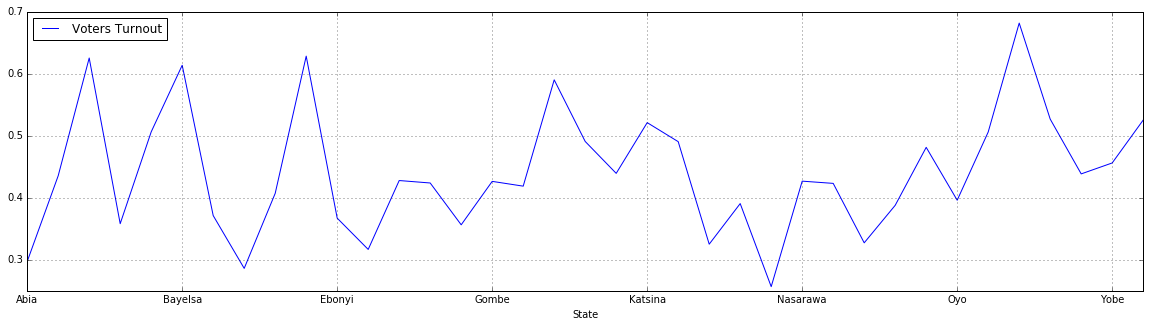

In [5]:
inec_table.plot(x="State", y='Voters Turnout', figsize=(20, 5), kind="line", grid=1)

### Five top states with the highest "Number_of_Reg_Voters"

In [6]:
inec_table.sort_values("Number_of_Reg_Voters", ascending=False)[:5]

,State,Capital,Code,Number_of_Reg_Voters,Number_of_Accr_Voters,AA,ACPN,AD,ADC,APA,...,UPP,Number_of_Valid_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA,Latitude,Longitude,Voters Turnout
24,Lagos,Ikeja,LA,5827846,1678754,1795,3038,4453,2072,2177,...,244,1443686,52289,1495975,9013534,2,20,6.455966,3.263435,0.256694
19,Kano,Kano,KN,4943862,2364434,426,778,708,657,2770,...,156,2128821,43626,2172447,9383682,1,44,12.107263,8.353610,0.439423
18,Kaduna,Kaduna,KD,3361793,1746031,218,424,273,546,1611,...,78,1617482,32719,1650201,6066562,3,23,10.704459,7.331567,0.490869
20,Katsina,Katsina,KT,2842741,1578646,183,402,283,498,1671,...,72,1449426,32288,1481714,5792578,4,34,13.029105,7.491887,0.521227
30,Oyo,Ibadan,OY,2344448,1073849,6331,8979,6282,5000,4468,...,3665,881352,47254,928606,5591589,5,33,8.219491,3.744396,0.396087


#### Which party got the highest vote among the top states with the highest "Number_of_Reg_Voters"

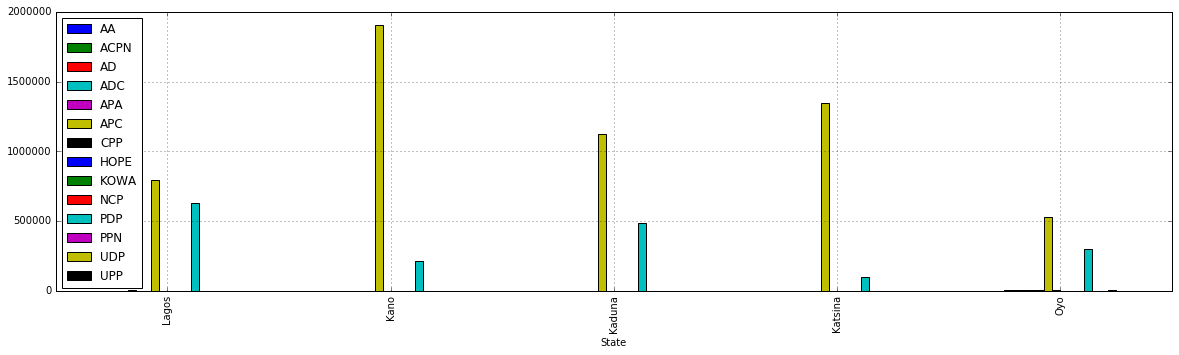

In [7]:
win1 = inec_table.sort_values("Number_of_Reg_Voters", ascending=False)[:5]

win1.plot(x="State", y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], 
          figsize=(20, 5), kind="bar", grid=1)

### Five top states with the highest number of "Total_Votes_Cast"

In [8]:
inec_table.sort_values("Total_Votes_Cast", ascending=False)[:5]

,State,Capital,Code,Number_of_Reg_Voters,Number_of_Accr_Voters,AA,ACPN,AD,ADC,APA,...,UPP,Number_of_Valid_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA,Latitude,Longitude,Voters Turnout
19,Kano,Kano,KN,4943862,2364434,426,778,708,657,2770,...,156,2128821,43626,2172447,9383682,1,44,12.107263,8.353610,0.439423
18,Kaduna,Kaduna,KD,3361793,1746031,218,424,273,546,1611,...,78,1617482,32719,1650201,6066562,3,23,10.704459,7.331567,0.490869
32,Rivers,Port Harcourt,RV,2324300,1643409,1066,525,1104,1031,513,...,156,1565461,19307,1584768,5185400,6,23,4.973002,6.810525,0.681826
24,Lagos,Ikeja,LA,5827846,1678754,1795,3038,4453,2072,2177,...,244,1443686,52289,1495975,9013534,2,20,6.455966,3.263435,0.256694
20,Katsina,Katsina,KT,2842741,1578646,183,402,283,498,1671,...,72,1449426,32288,1481714,5792578,4,34,13.029105,7.491887,0.521227


#### Which party got the highest vote among the top states with the highest "Total_Votes_Cast"

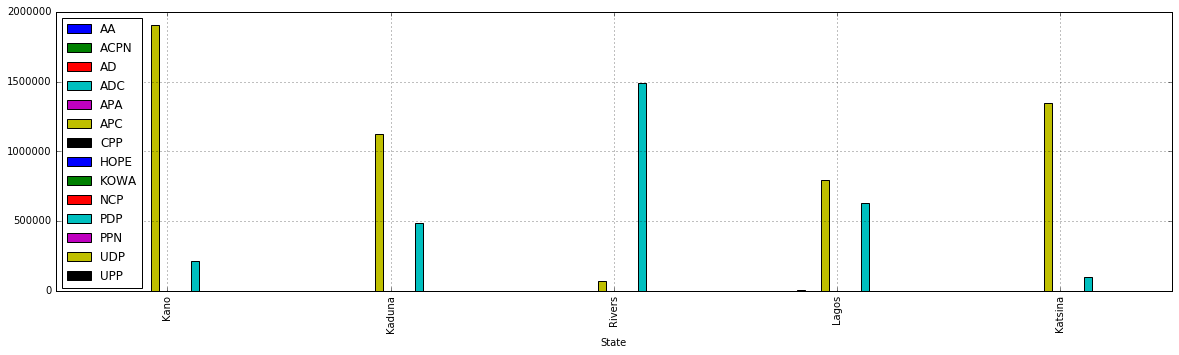

In [9]:
win2 = inec_table.sort_values("Total_Votes_Cast", ascending=False)[:5]

win2.plot(x="State", y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], 
          figsize=(20, 5), kind="bar", grid=1)

### Five top states with the highest "Population"

In [10]:
inec_table.sort_values("Population", ascending=False)[:5]

,State,Capital,Code,Number_of_Reg_Voters,Number_of_Accr_Voters,AA,ACPN,AD,ADC,APA,...,UPP,Number_of_Valid_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA,Latitude,Longitude,Voters Turnout
19,Kano,Kano,KN,4943862,2364434,426,778,708,657,2770,...,156,2128821,43626,2172447,9383682,1,44,12.107263,8.353610,0.439423
24,Lagos,Ikeja,LA,5827846,1678754,1795,3038,4453,2072,2177,...,244,1443686,52289,1495975,9013534,2,20,6.455966,3.263435,0.256694
18,Kaduna,Kaduna,KD,3361793,1746031,218,424,273,546,1611,...,78,1617482,32719,1650201,6066562,3,23,10.704459,7.331567,0.490869
20,Katsina,Katsina,KT,2842741,1578646,183,402,283,498,1671,...,72,1449426,32288,1481714,5792578,4,34,13.029105,7.491887,0.521227
30,Oyo,Ibadan,OY,2344448,1073849,6331,8979,6282,5000,4468,...,3665,881352,47254,928606,5591589,5,33,8.219491,3.744396,0.396087


#### Which party got the highest vote among the top states with the highest "Population"

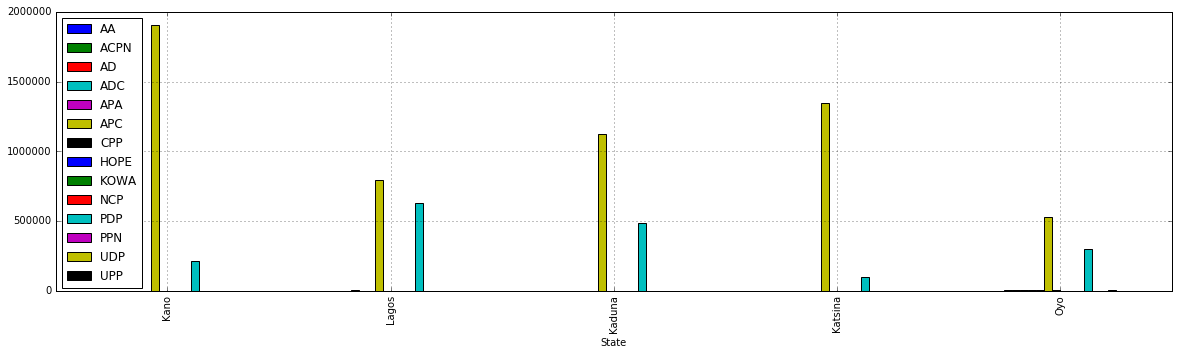

In [11]:
win3 = inec_table.sort_values("Population", ascending=False)[:5]

win3.plot(x="State", y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], 
          figsize=(20, 5), kind="bar", grid=1)

### Five top states with the highest "Number_of_LGA"

In [12]:
inec_table.sort_values("Number_of_LGA", ascending=False)[:5]

,State,Capital,Code,Number_of_Reg_Voters,Number_of_Accr_Voters,AA,ACPN,AD,ADC,APA,...,UPP,Number_of_Valid_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA,Latitude,Longitude,Voters Turnout
19,Kano,Kano,KN,4943862,2364434,426,778,708,657,2770,...,156,2128821,43626,2172447,9383682,1,44,12.107263,8.353610,0.439423
20,Katsina,Katsina,KT,2842741,1578646,183,402,283,498,1671,...,72,1449426,32288,1481714,5792578,4,34,13.029105,7.491887,0.521227
30,Oyo,Ibadan,OY,2344448,1073849,6331,8979,6282,5000,4468,...,3665,881352,47254,928606,5591589,5,33,8.219491,3.744396,0.396087
2,Akwa Ibom,Uyo,AK,1644481,1074070,1600,443,474,608,384,...,144,1017064,11487,1028551,3920208,15,31,4.832722,7.812528,0.625456
29,Osun,Oshogbo,OS,1378113,683169,377,1731,1667,937,1306,...,159,642615,20758,663373,3423535,19,30,7.578210,4.485878,0.481363


#### Which party got the highest vote among the top states with the highest "Number_of_LGA"

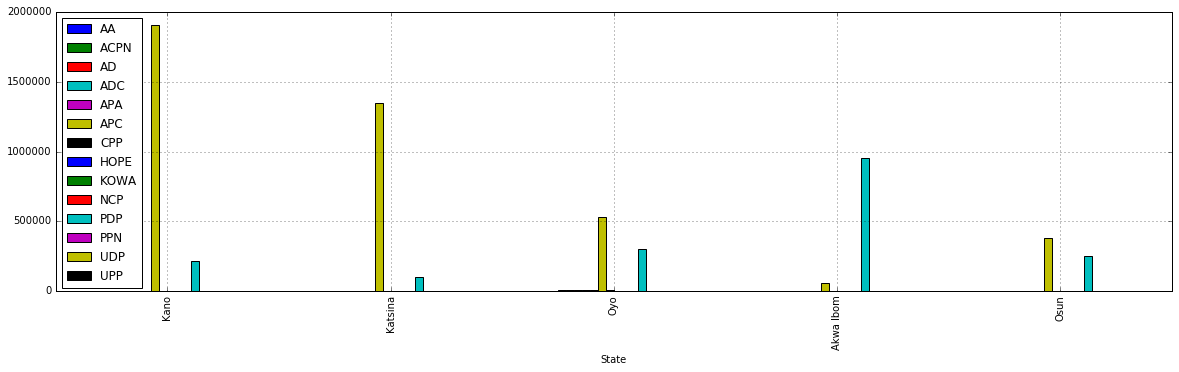

In [13]:
win4 = inec_table.sort_values("Number_of_LGA", ascending=False)[:5]

win4.plot(x="State", y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], 
          figsize=(20, 5), kind="bar", grid=1)

### Lets extract the following columns out to form a separate dataframe from the dataset
1~ Number_of_Registered_Voters<br />
2~ Number_of_Accredited_Voters<br />
3~ Number_of_Valid_Votes<br />
4~ Number_of_Rejected_Votes<br />
5~ Total_Votes_Cast<br />
6~ Population<br />
7~ Population_Rank<br />
8~ Number_of_LGA<br />

In [14]:
voters_table = inec_table[['State', 'Number_of_Reg_Voters', 'Number_of_Accr_Voters', 'Number_of_Valid_Votes', 'Number_of_Rejected_Votes', 
                         'Number_of_Rejected_Votes', 'Total_Votes_Cast', 'Population', 'Population_Rank', 'Number_of_LGA']]
voters_table

,State,Number_of_Reg_Voters,Number_of_Accr_Voters,Number_of_Valid_Votes,Number_of_Rejected_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA
0,Abia,1349134,442538,391045,10004,10004,401049,2833999,28,17
1,Adamawa,1518123,709993,636018,25192,25192,661210,3168101,26,21
2,Akwa Ibom,1644481,1074070,1017064,11487,11487,1028551,3920208,15,31
3,Anambra,1963427,774430,688584,14825,14825,703409,4182032,10,21
4,Bauchi,2053484,1094069,1020338,19437,19437,1039775,4676465,7,20
5,Bayelsa,605637,384789,367067,4672,4672,371739,1703358,36,8
6,Benue,1893596,754634,683264,19867,19867,703131,4219244,9,23
7,Borno,1799669,544759,501920,13088,13088,515008,4151193,11,27
8,Cross River,1144288,500577,450514,15392,15392,465906,2888966,27,18
9,Delta,2044372,1350914,1267773,17075,17075,1284848,4098391,12,25


### Summary statistics of voters_table

In [15]:
voters_table.describe()

,Number_of_Reg_Voters,Number_of_Accr_Voters,Number_of_Valid_Votes,Number_of_Rejected_Votes,Number_of_Rejected_Votes,Total_Votes_Cast,Population,Population_Rank,Number_of_LGA
count,3.700000e+01,3.700000e+01,3.700000e+01,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000
mean,1.822218e+06,8.580132e+05,7.726369e+05,22824.837838,22824.837838,7.954617e+05,3.783880e+06,19.000000,20.918919
std,1.026219e+06,4.641212e+05,4.245404e+05,11468.557038,11468.557038,4.310620e+05,1.713420e+06,10.824355,7.488430
min,6.056370e+05,3.237390e+05,3.006910e+05,4672.000000,4672.000000,3.094450e+05,1.405201e+06,1.000000,6.000000
25%,1.349134e+06,5.201270e+05,4.737960e+05,14825.000000,14825.000000,4.917670e+05,2.833999e+06,10.000000,17.000000
50%,1.644481e+06,7.099930e+05,6.426150e+05,19867.000000,19867.000000,6.633730e+05,3.423535e+06,19.000000,20.000000
75%,1.977211e+06,1.074070e+06,9.823880e+05,29449.000000,29449.000000,1.000692e+06,4.182032e+06,28.000000,25.000000
max,5.827846e+06,2.364434e+06,2.128821e+06,52289.000000,52289.000000,2.172447e+06,9.383682e+06,37.000000,44.000000


### Graph "Number_of_Registered_Voters" Vs "Number_of_Accredited_Voters" Vs "Population"
Naturally, "Number_of_Registered_Voters" should be higher than "Number_of_Accredited_Voters". Likewise, "Population" should be higher than both "Number_of_Registered_Voters" and "Number_of_Accredited_Voters". Lets see if there is any odd case in any particular state?

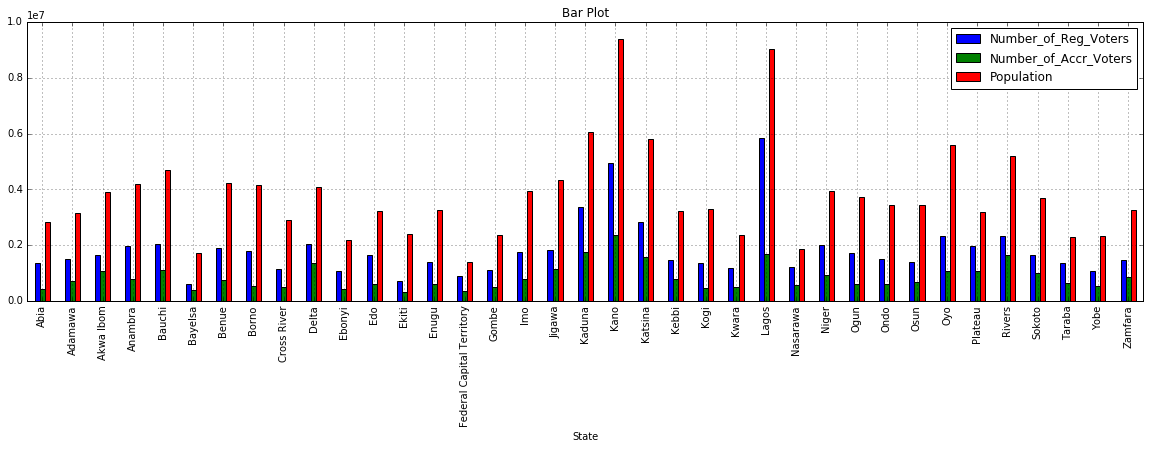

In [16]:
voters_table.plot(x='State', y=['Number_of_Reg_Voters', 'Number_of_Accr_Voters', 'Population'], kind='bar', figsize=(20, 5), title='Bar Plot', grid=1)

### Lets extract the parties columns out to form a separate dataframe from the dataset

In [17]:
parties_table = inec_table[['State', 'AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP']] 

parties_table

,State,AA,ACPN,AD,ADC,APA,APC,CPP,HOPE,KOWA,NCP,PDP,PPN,UDP,UPP
0,Abia,315,2194,448,569,2766,13394,1046,125,173,745,368303,424,213,330
1,Adamawa,495,1166,595,1012,1549,374701,819,267,752,1212,251664,1163,289,334
2,Akwa Ibom,1600,443,474,608,384,58411,412,192,160,381,953304,327,224,144
3,Anambra,547,1259,475,534,2303,17926,1279,357,311,887,660762,537,286,1121
4,Bauchi,131,232,173,189,964,931598,391,46,128,207,86085,128,29,37
5,Bayelsa,45,38,69,116,70,5194,44,18,52,95,361209,62,20,35
6,Benue,315,1464,254,539,945,373961,567,115,105,683,303737,439,66,74
7,Borno,145,243,392,201,878,473543,310,88,158,107,25640,143,31,41
8,Cross River,279,514,709,749,532,28358,381,237,312,930,414863,864,289,1487
9,Delta,1473,916,735,888,478,48910,813,166,311,670,1211405,393,354,261


### Summary statistics of parties_table

In [18]:
parties_table.describe()

,AA,ACPN,AD,ADC,APA,APC,CPP,HOPE,KOWA,NCP,PDP,PPN,UDP,UPP
count,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000
mean,597.972973,1089.486486,829.000000,801.783784,1446.945946,4.168895e+05,981.081081,200.945946,353.405405,660.945946,3.473828e+05,661.486486,248.864865,492.432432
std,1058.202944,1537.150658,1193.011688,893.409143,994.589389,4.137989e+05,1098.046583,208.625388,425.865489,418.460336,3.159930e+05,780.911704,307.701800,1008.016026
min,40.000000,38.000000,69.000000,105.000000,70.000000,5.194000e+03,44.000000,4.000000,48.000000,95.000000,2.552600e+04,62.000000,20.000000,29.000000
25%,159.000000,391.000000,279.000000,375.000000,674.000000,1.203310e+05,381.000000,83.000000,153.000000,394.000000,1.492220e+05,327.000000,79.000000,72.000000
50%,315.000000,538.000000,474.000000,539.000000,1165.000000,3.082900e+05,819.000000,144.000000,203.000000,670.000000,2.516640e+05,476.000000,184.000000,156.000000
75%,533.000000,1214.000000,735.000000,888.000000,2177.000000,5.678830e+05,1046.000000,255.000000,312.000000,784.000000,4.148630e+05,680.000000,286.000000,290.000000
max,6331.000000,8979.000000,6282.000000,5000.000000,4468.000000,1.903999e+06,6674.000000,989.000000,2274.000000,1895.000000,1.487075e+06,4339.000000,1623.000000,4859.000000


### Sum of Votes gotten by each party

In [19]:
vote_sum = parties_table[['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP']].sum()

vote_sum

AA         22125
ACPN       40311
AD         30673
ADC        29666
APA        53537
APC     15424911
CPP        36300
HOPE        7435
KOWA       13076
NCP        24455
PDP     12853162
PPN        24475
UDP         9208
UPP        18220
dtype: int64

### Visualize the total votes by party

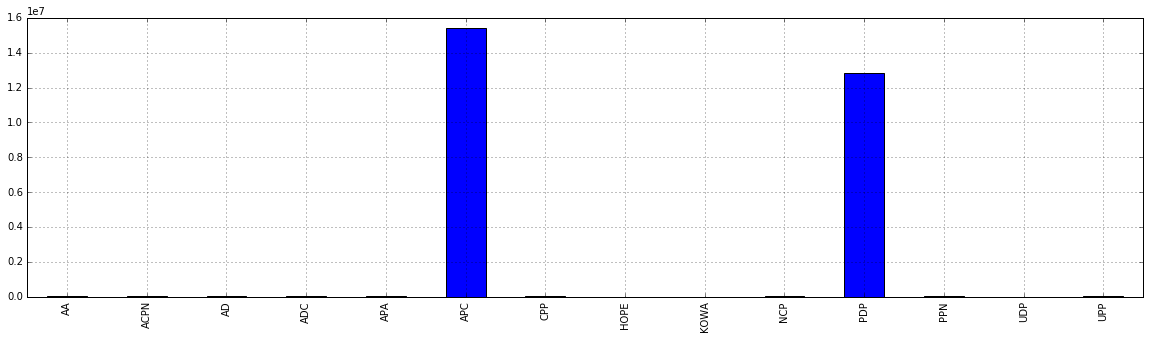

In [20]:
vote_sum.plot(kind='bar', figsize=(20, 5), grid=1)

#### As you can see, votes gotten by "APC" and "PDP" far outweighs that of other parties. So lets focus on these two biggest parties...

### Visualize votes of "APC" and "PDP" by states

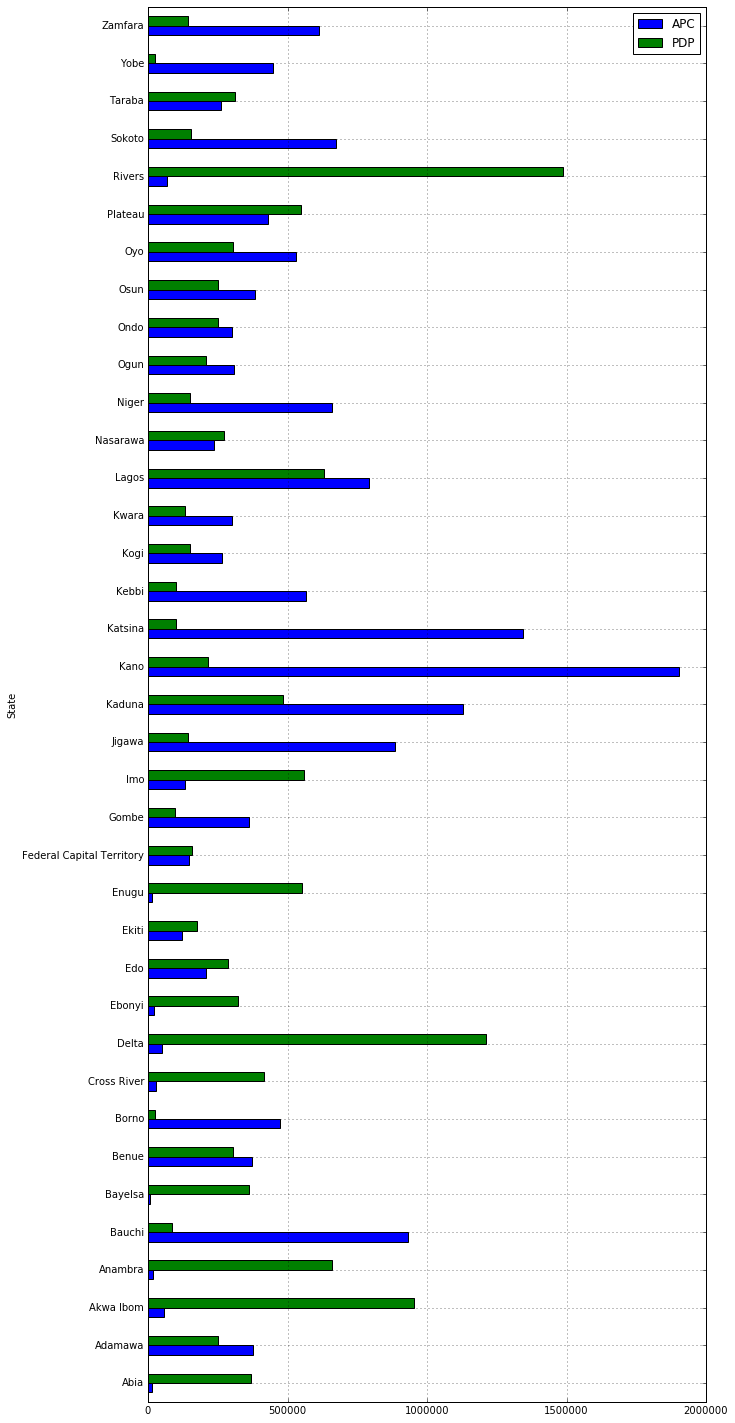

In [21]:
parties_table.plot(x="State", y=["APC", "PDP"], figsize=(10,25), kind="barh", grid=100)

### States with lowest votes

Lets see what the bottom states with lowest number of votes have to offer

In [22]:
low_vote_states = vote_sum.sort_values()[:11]
low_vote_states

HOPE     7435
UDP      9208
KOWA    13076
UPP     18220
AA      22125
NCP     24455
PPN     24475
ADC     29666
AD      30673
CPP     36300
ACPN    40311
dtype: int64

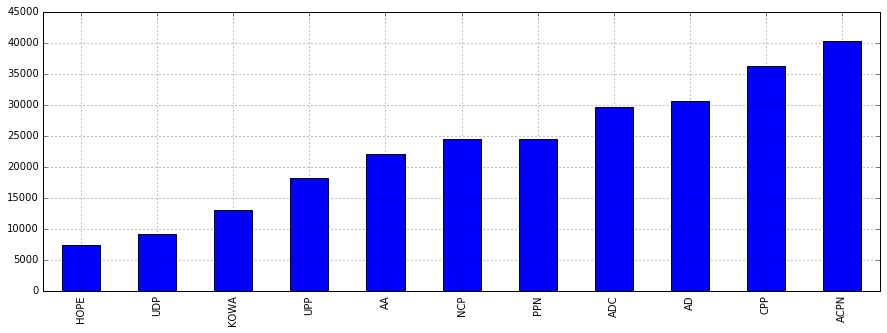

In [23]:
low_vote_states.plot(kind="bar", figsize=(15, 5), grid=100)

## HOPE Party
Lets see the state that voted most for the lowest rank party - HOPE

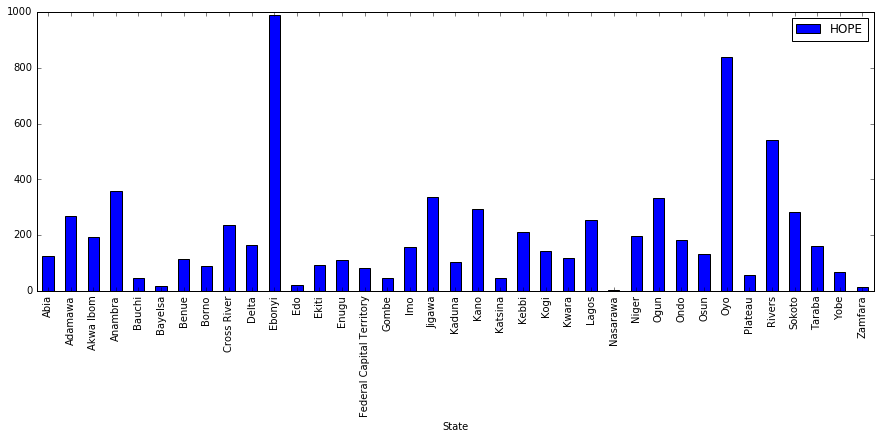

In [24]:
hope_party = parties_table[['State', 'HOPE']]
hope_party.plot(x='State', y='HOPE', kind='bar', figsize=(15, 5))

As seen above, the states that voted most for lowest rank party (HOPE) are Ebonyi, Oyo and Rivers.

# What next?
You can do more with this dataset, but for me that is it on analysing Nigeria 2015 presidential election result with python.

Next, I will do a spatial analysis on thesame election result dataset with <b>QGIS (http://qgis.org/)</b> and <b>Tableau (http://tableau.com/)</b>. Note that there are excellent python packages that supports spatial analysis, namely: GeoPandas, PySAL, Pyshp, Shapely, ArcPy, PyQGIS, Fiona, Rasterio, GDAL/OGR etc

So if you are interested in the spatial analysis, click on the link below:-

~1~ <a href="http://umar-yusuf.blogspot.com/2016/09/Spatial-Analysis-of-Nigeria-2015-Presidential-Election-Result-Using-QGIS.html">Spatial Analysis of Nigeria 2015 Presidential Election Result Using QGIS</a> - <b>Desktop Visualization</b>

~2~ <a href="http://umar-yusuf.blogspot.com/2016/09/Spatial-Analysis-of-Nigeria-2015-Presidential-Election-Result-Using-Tableau.html">Spatial Analysis of Nigeria 2015 Presidential Election Result Using Tableau</a> - <b>Web-based Visualization</b>